

---


**TRAIN  ball, players, and referees detection model YOLOv8 (Kaggle - GPU T4 x2)**

---



**View Deployment Status** https://app.roboflow.com/tonyphamhp/football-players-detection-3zvbc-kerdk/2

**Public Model Page** https://universe.roboflow.com/tonyphamhp/football-players-detection-3zvbc-kerdk/model/2



---


**TRAIN pitch keypoints detection model YOLOv8  (GGColab - GPU T4 x2)**

---



**View Deployment Status** https://app.roboflow.com/tonyphamhp/football-field-detection-f07vi-okdo7/1

**Public Model Page** https://universe.roboflow.com/tonyphamhp/football-field-detection-f07vi-okdo7/model/1



---


**API Keys**

---






In [ ]:
!nvidia-smi

Wed Nov 12 06:58:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")



---


**Install dependencjes**

---



In [ ]:
!pip install -q gdown inference-gpu

In [ ]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done


In [ ]:
!pip list | grep supervision

supervision                              0.26.1


In [ ]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:01<00:00, 18.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:01<00:00, 16.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 23.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 29.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 61.6MB/s]


In [ ]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

ball, player, goalkeeper and referee detection



---
**BALL - PLAYER - GOALKEEPER - REFEREE DETECTION**


---





In [ ]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
PLAYER_DETECTION_MODEL_ID =  "football-players-detection-3zvbc-kerdk/2"
PLAYER_DETECTION_MODEL = get_model(
    model_id = PLAYER_DETECTION_MODEL_ID,
    api_key=ROBOFLOW_API_KEY
)

ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support GroundingDINO model. Use pip install 'inference[grounding-dino]' to install missing requirements.To suppress this warning, set CORE_MODEL_GROUNDINGDINO_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support YoloWorld model. Use pip install 'infe

Annotator players

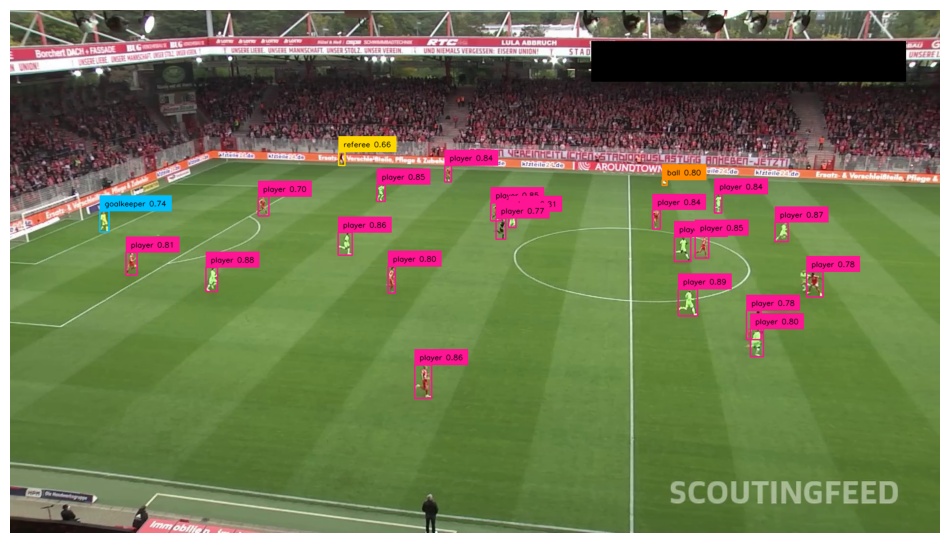

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

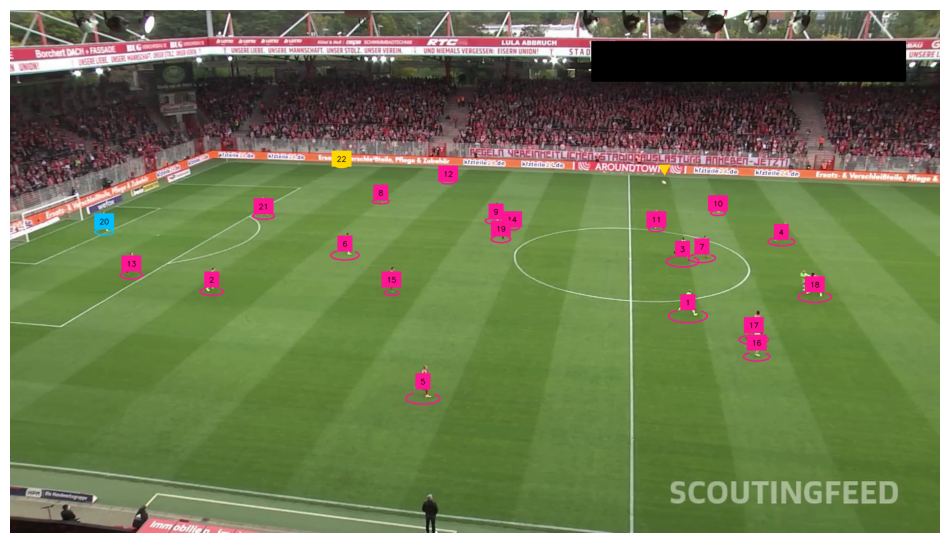

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0


ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21
)

tracker = sv.ByteTrack()
tracker.reset()


frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id = all_detections.class_id - 1
all_detections = tracker.update_with_detections(detections=all_detections)

labels = [
    f"{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(annotated_frame,all_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame,ball_detections)
annotated_frame = label_annotator.annotate(annotated_frame,all_detections,labels=labels)

sv.plot_image(annotated_frame)



---
**SPLIT PLAYERS INTO TEAMS**

PAPER: [Sigmoid Loss for Language Image Pre-Training](https://openaccess.thecvf.com/content/ICCV2023/papers/Zhai_Sigmoid_Loss_for_Language_Image_Pre-Training_ICCV_2023_paper.pdf)

---


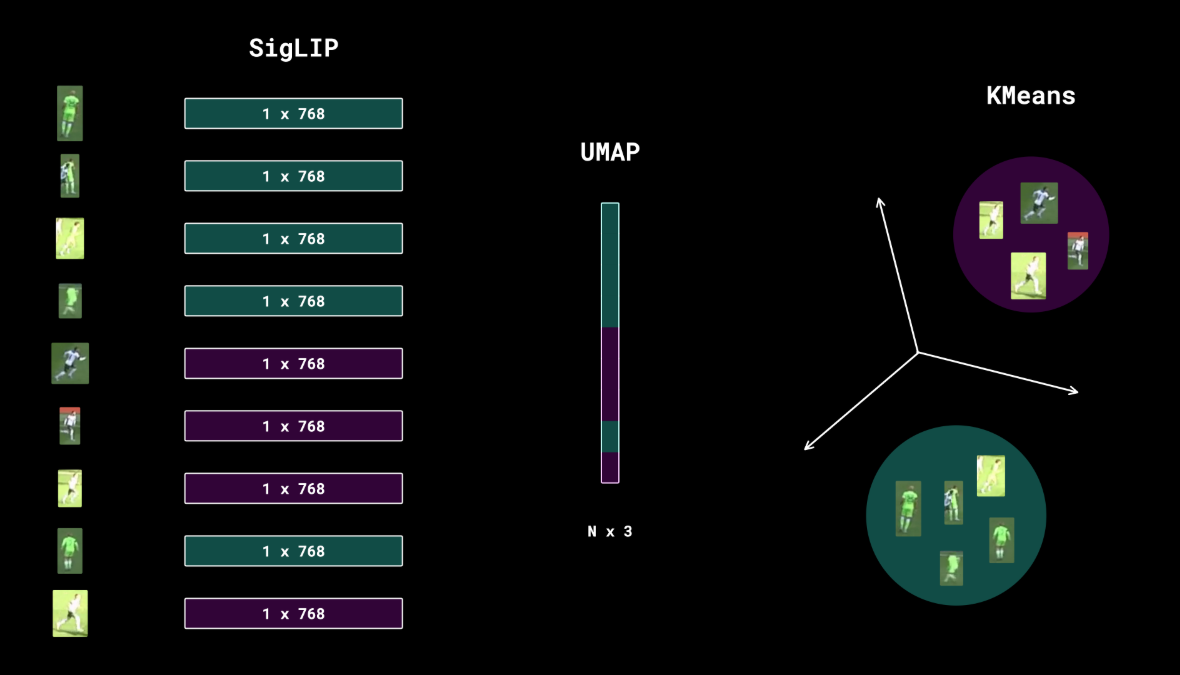


---






In [ ]:
from tqdm import tqdm


STRIDE = 30
PLAYER_ID = 2

def extract_crops(SOURCE_VIDEO_PATH: str):
    frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, stride=STRIDE)

    crops = []
    for frame in tqdm(frame_generator, desc='collecting crops'):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)
        detections = detections.with_nms(threshold=0.5, class_agnostic=True)
        detections = detections[detections.class_id == PLAYER_ID]
        crops += [
            sv.crop_image(frame, xyxy)
            for xyxy
            in detections.xyxy
        ]
    return crops

In [ ]:
crops = extract_crops(SOURCE_VIDEO_PATH)

collecting crops: 25it [00:10,  2.49it/s]


In [ ]:
len(crops)

488

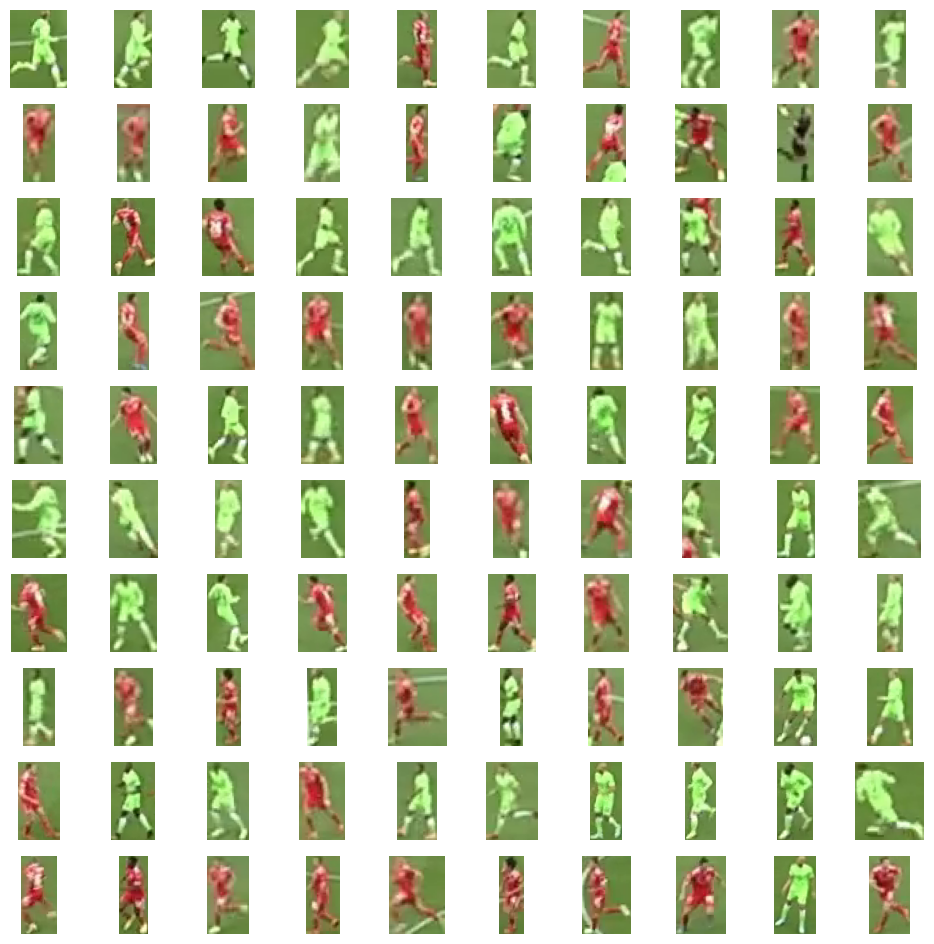

In [ ]:
sv.plot_images_grid(crops[:100], grid_size=(10,10))

In [ ]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:06,  2.66it/s]


In [ ]:
data.shape

(488, 768)

In [ ]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [ ]:
projections = REDUCER.fit_transform(data)

In [ ]:
projections.shape

(488, 3)

In [ ]:
clusters = CLUSTERING_MODEL.fit_predict(projections)

In [ ]:
clusters[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [ ]:
team_0 = [
    crop
    for crop, cluster
    in zip(crops, clusters)
    if cluster == 0
]

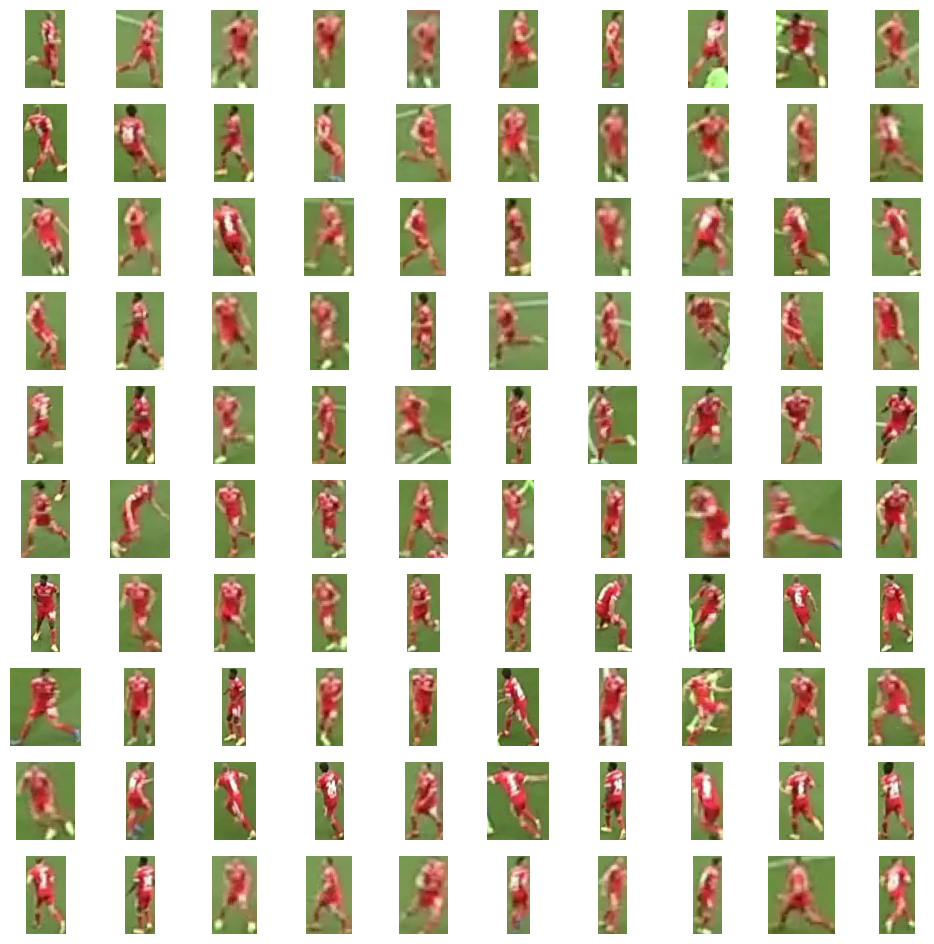

In [ ]:
sv.plot_images_grid(team_0[:100], grid_size=(10,10))

collecting crops: 25it [00:10,  2.48it/s]
Embedding extraction: 16it [00:06,  2.30it/s]
Embedding extraction: 1it [00:00,  3.09it/s]


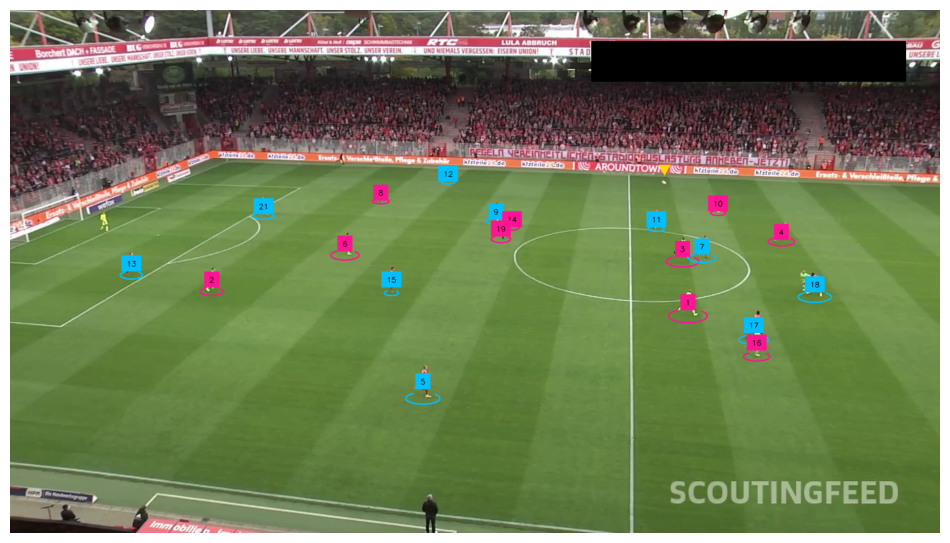

In [ ]:
import supervision as sv
from sports.common.team import  TeamClassifier

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
PLAYER_ID = 2


crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21
)

tracker = sv.ByteTrack()
tracker.reset()


frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

players_detections = all_detections[all_detections.class_id == PLAYER_ID]
players_crops = [ sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

labels = [
    f"{tracker_id}"
    for tracker_id
    in players_detections.tracker_id
]



annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(annotated_frame,players_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame,ball_detections)
annotated_frame = label_annotator.annotate(annotated_frame,players_detections,labels=labels)


sv.plot_image(annotated_frame)

Add color goalkeeper

In [ ]:
def resolve_goalkeepers_team_id(
    players_detections: sv.Detections,
    goalkeepers_detections: sv.Detections
):
    goalkeepers_xy = goalkeepers_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)

    team_0_centroid = players_xy[players_detections.class_id == 0].mean(axis=0)
    team_1_centroid = players_xy[players_detections.class_id == 1].mean(axis=0)

    goalkeepers_team_ids = []
    for goalkeepers_xy in goalkeepers_xy:
        dist_0 = np.linalg.norm(goalkeepers_xy - team_0_centroid)
        dist_1 = np.linalg.norm(goalkeepers_xy - team_1_centroid)
        goalkeepers_team_ids.append(0 if dist_0 < dist_1 else 1)

    return np.array(goalkeepers_team_ids)


collecting crops: 25it [00:10,  2.46it/s]
Embedding extraction: 16it [00:05,  2.76it/s]
Embedding extraction: 1it [00:00,  4.30it/s]


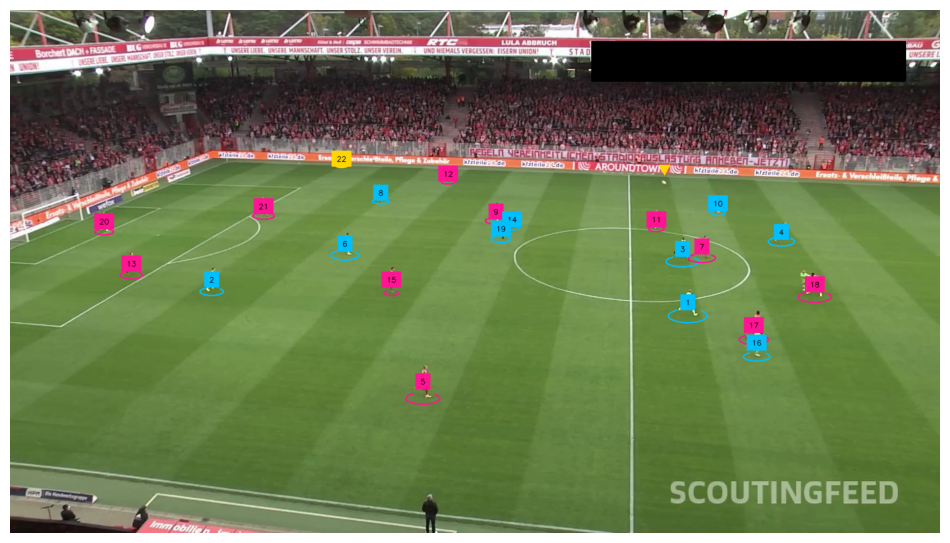

In [ ]:
  import supervision as sv
  from sports.common.team import  TeamClassifier

  SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
  BALL_ID = 0
  GOALKEEPER_ID = 1
  PLAYER_ID = 2
  REFEREE_ID = 3



  crops = extract_crops(SOURCE_VIDEO_PATH)
  team_classifier = TeamClassifier(device=DEVICE)
  team_classifier.fit(crops)

  ellipse_annotator = sv.EllipseAnnotator(
      color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
      thickness=2
  )

  label_annotator = sv.LabelAnnotator(
      color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
      text_color=sv.Color.from_hex('#000000'),
      text_position=sv.Position.CENTER
  )

  triangle_annotator = sv.TriangleAnnotator(
      color=sv.Color.from_hex('#FFD700'),
      base=25,
      height=21
  )

  tracker = sv.ByteTrack()
  tracker.reset()


  frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
  frame = next(frame_generator)

  result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
  detections = sv.Detections.from_inference(result)

  ball_detections = detections[detections.class_id == BALL_ID]
  ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

  all_detections = detections[detections.class_id != BALL_ID]
  all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
  all_detections = tracker.update_with_detections(detections=all_detections)

  players_detections = all_detections[all_detections.class_id == PLAYER_ID]
  goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
  referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

  players_crops = [ sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
  players_detections.class_id = team_classifier.predict(players_crops)

  goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
      players_detections, goalkeepers_detections
  )

  referees_detections.class_id -=1

  all_detections = sv.Detections.merge([players_detections, goalkeepers_detections, referees_detections])

  #players_detections.class_id = goalkeepers_detections_team_ids

  labels = [
      f"{tracker_id}"
      for tracker_id
      in all_detections.tracker_id
  ]



  annotated_frame = frame.copy()
  annotated_frame = ellipse_annotator.annotate(annotated_frame,all_detections)
  annotated_frame = triangle_annotator.annotate(annotated_frame,ball_detections)
  annotated_frame = label_annotator.annotate(annotated_frame,all_detections,labels=labels)


  sv.plot_image(annotated_frame)



---


**VIDEO DEMO**

---



In [ ]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
TARGET_VIDEO_PATH = "/content/121364_0_result.mp4"

box_annotator = sv.BoxAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness = 2
)

label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.from_hex("#000000")
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections["class_name"], detections.confidence)
        ]

        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(annotated_frame, detections=detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections=detections)
        video_sink.write_frame(annotated_frame)

#sv.plot_image(annotated_frame)

100%|██████████| 750/750 [01:19<00:00,  9.42it/s]




---


**VIDEO FINAL**

---



In [ ]:
  import supervision as sv
  from sports.common.team import  TeamClassifier

  SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
  OUTPUT_VIDEO_PATH = "/content/121364_1_result.mp4"

  BALL_ID = 0
  GOALKEEPER_ID = 1
  PLAYER_ID = 2
  REFEREE_ID = 3



  crops = extract_crops(SOURCE_VIDEO_PATH)
  team_classifier = TeamClassifier(device=DEVICE)
  team_classifier.fit(crops)

  ellipse_annotator = sv.EllipseAnnotator(
      color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
      thickness=2
  )

  label_annotator = sv.LabelAnnotator(
      color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
      text_color=sv.Color.from_hex('#000000'),
      text_position=sv.Position.CENTER
  )

  triangle_annotator = sv.TriangleAnnotator(
      color=sv.Color.from_hex('#FFD700'),
      base=25,
      height=21
  )

  tracker = sv.ByteTrack()
  tracker.reset()


  frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
  video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

  with sv.VideoSink(OUTPUT_VIDEO_PATH, video_info=video_info) as sink:
      for frame in tqdm(frame_generator, desc="Processing video"):
          result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
          detections = sv.Detections.from_inference(result)

          ball_detections = detections[detections.class_id == BALL_ID]
          ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

          all_detections = detections[detections.class_id != BALL_ID]
          all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
          all_detections = tracker.update_with_detections(detections=all_detections)

          players_detections = all_detections[all_detections.class_id == PLAYER_ID]
          goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
          referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

          players_crops = [ sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
          players_detections.class_id = team_classifier.predict(players_crops)

          goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
              players_detections, goalkeepers_detections
          )

          referees_detections.class_id -=1

          all_detections = sv.Detections.merge([players_detections, goalkeepers_detections, referees_detections])

          #players_detections.class_id = goalkeepers_detections_team_ids

          labels = [
              f"{tracker_id}"
              for tracker_id
              in all_detections.tracker_id
          ]

          annotated_frame = frame.copy()

          all_detections.class_id = all_detections.class_id.astype(int)
          annotated_frame = ellipse_annotator.annotate(annotated_frame,all_detections)
          annotated_frame = triangle_annotator.annotate(annotated_frame,ball_detections)
          annotated_frame = label_annotator.annotate(annotated_frame,all_detections,labels=labels)

          sink.write_frame(annotated_frame)

  #sv.plot_image(annotated_frame)

collecting crops: 25it [00:09,  2.63it/s]
Embedding extraction: 16it [00:05,  2.67it/s]
Processing video: 0it [00:00, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
Processing video: 1it [00:00,  2.21it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.12it/s]
Processing video: 2it [00:00,  2.42it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.11it/s]
Processing video: 3it [00:01,  2.43it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.17it/s]
Processing video: 4it [00:01,  2.47it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.10it/s]
Processing video: 5it [00:02,  2.51it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.44it/s]
Processing video: 6it [00:02,  2.57it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.44it/s]
Processing video: 7it [00:0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful



---


VIDEO FINAL:  https://drive.google.com/file/d/17TuXiFwZx6HwWV9NRw8eEbWo75IvEdYy/view?usp=sharing  

---



**Pitch keypoint detection**

In [ ]:
ROBOFLOW_API_KEY = "zqM7HkFJLnOrlJTQclZB"


In [ ]:
PITCH_DETECTION_MODEL_ID = "football-field-detection-f07vi-okdo7/1"
PITCH_DETECTION_MODEL = get_model(PITCH_DETECTION_MODEL_ID, ROBOFLOW_API_KEY)

In [ ]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
FIELD_DETECTION_MODEL_ID = "football-field-detection-f07vi-okdo7/1"
FIELD_DETECTION_MODEL = get_model(model_id=FIELD_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

[11/12/25 07:14:48] ERROR    Unknown resize method, defaulting to 'Stretch to' - this may result in ]8;id=790865;file:///usr/local/lib/python3.12/dist-packages/inference/core/models/roboflow.py\roboflow.py]8;;\:]8;id=922205;file:///usr/local/lib/python3.12/dist-packages/inference/core/models/roboflow.py#478\478]8;;\
                             degraded model performance.                                                           

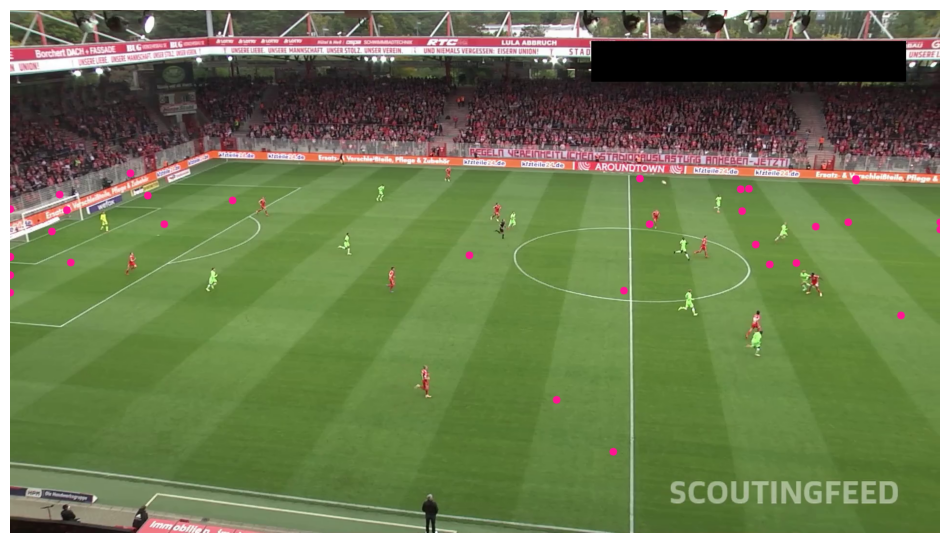

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

sv.plot_image(annotated_frame)

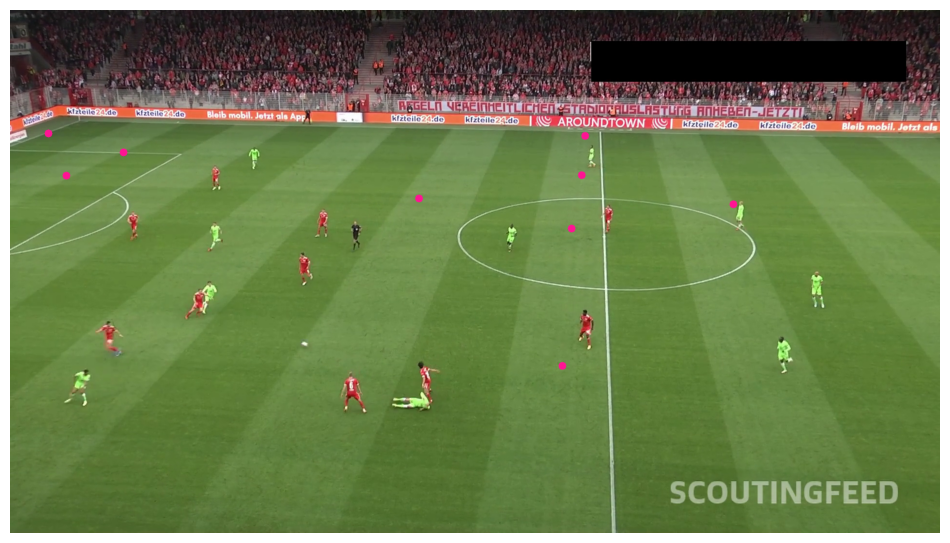

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

**Project pitch lines on frame**

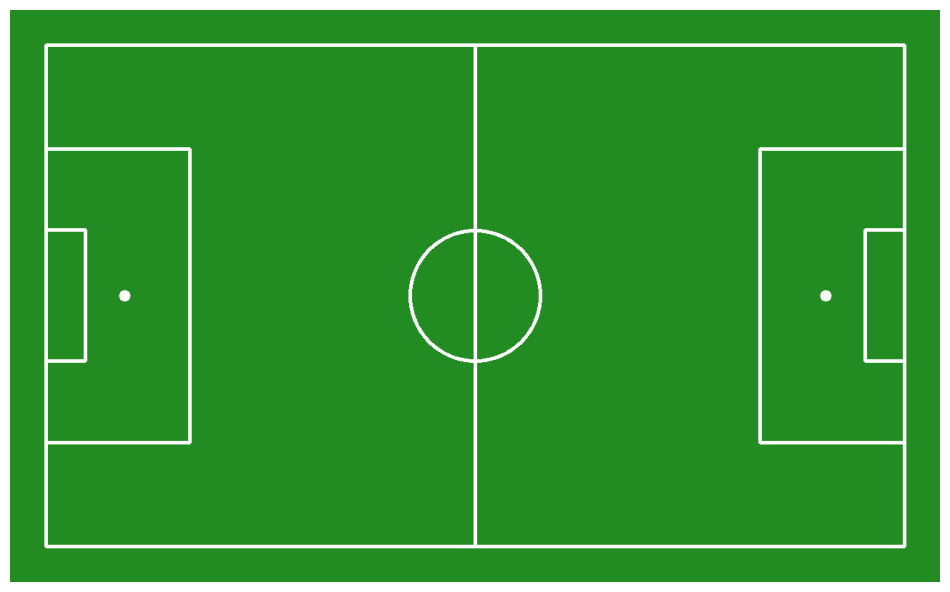

In [ ]:
from sports.annotators.soccer import draw_pitch
from sports.configs.soccer import SoccerPitchConfiguration

CONFIG = SoccerPitchConfiguration()

annotated_frame = draw_pitch(CONFIG)

sv.plot_image(annotated_frame)

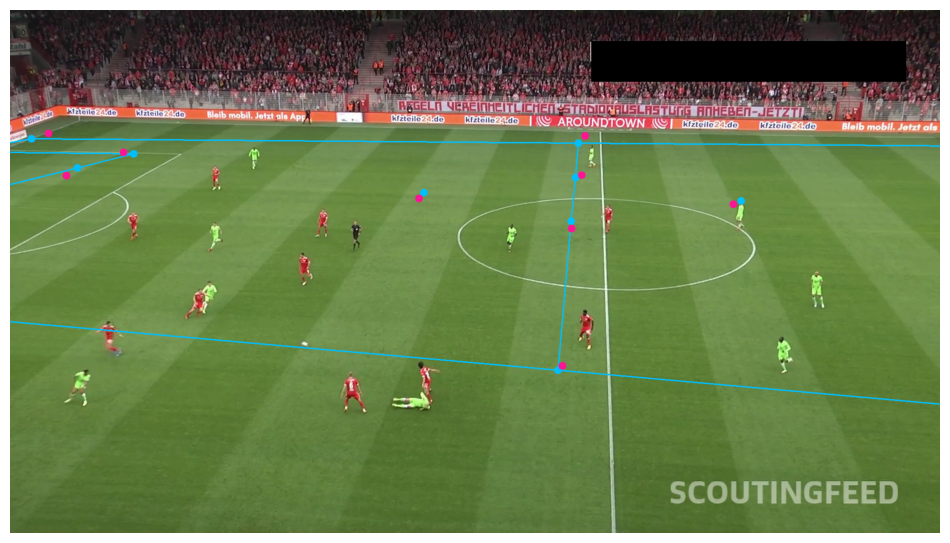

In [ ]:
import numpy as np
import supervision as sv
from sports.common.view import ViewTransformer

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

pitch_reference_points = np.array(CONFIG.vertices)[filter]

transformer = ViewTransformer(
    source=pitch_reference_points,
    target=frame_reference_points
)

pitch_all_points = np.array(CONFIG.vertices)
frame_all_points = transformer.transform_points(points=pitch_all_points)

frame_all_key_points = sv.KeyPoints(xy=frame_all_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator_2.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

Project ball, players and referies on pitch

In [ ]:
import supervision as sv
from tqdm import tqdm
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)
    players_detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

team_classifier = TeamClassifier(device="cuda")
team_classifier.fit(crops)

collecting crops: 25it [00:15,  1.61it/s]
Embedding extraction: 18it [00:06,  2.58it/s]


In [ ]:
import cv2
from typing import Optional

def draw_pitch_voronoi_diagram_2(
    config: SoccerPitchConfiguration,
    team_1_xy: np.ndarray,
    team_2_xy: np.ndarray,
    team_1_color: sv.Color = sv.Color.RED,
    team_2_color: sv.Color = sv.Color.WHITE,
    opacity: float = 0.5,
    padding: int = 50,
    scale: float = 0.1,
    pitch: Optional[np.ndarray] = None
) -> np.ndarray:
    """
    Draws a Voronoi diagram on a soccer pitch representing the control areas of two
    teams with smooth color transitions.

    Args:
        config (SoccerPitchConfiguration): Configuration object containing the
            dimensions and layout of the pitch.
        team_1_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 1.
        team_2_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 2.
        team_1_color (sv.Color, optional): Color representing the control area of
            team 1. Defaults to sv.Color.RED.
        team_2_color (sv.Color, optional): Color representing the control area of
            team 2. Defaults to sv.Color.WHITE.
        opacity (float, optional): Opacity of the Voronoi diagram overlay.
            Defaults to 0.5.
        padding (int, optional): Padding around the pitch in pixels.
            Defaults to 50.
        scale (float, optional): Scaling factor for the pitch dimensions.
            Defaults to 0.1.
        pitch (Optional[np.ndarray], optional): Existing pitch image to draw the
            Voronoi diagram on. If None, a new pitch will be created. Defaults to None.

    Returns:
        np.ndarray: Image of the soccer pitch with the Voronoi diagram overlay.
    """
    if pitch is None:
        pitch = draw_pitch(
            config=config,
            padding=padding,
            scale=scale
        )

    scaled_width = int(config.width * scale)
    scaled_length = int(config.length * scale)

    voronoi = np.zeros_like(pitch, dtype=np.uint8)

    team_1_color_bgr = np.array(team_1_color.as_bgr(), dtype=np.uint8)
    team_2_color_bgr = np.array(team_2_color.as_bgr(), dtype=np.uint8)

    y_coordinates, x_coordinates = np.indices((
        scaled_width + 2 * padding,
        scaled_length + 2 * padding
    ))

    y_coordinates -= padding
    x_coordinates -= padding

    def calculate_distances(xy, x_coordinates, y_coordinates):
        return np.sqrt((xy[:, 0][:, None, None] * scale - x_coordinates) ** 2 +
                       (xy[:, 1][:, None, None] * scale - y_coordinates) ** 2)

    distances_team_1 = calculate_distances(team_1_xy, x_coordinates, y_coordinates)
    distances_team_2 = calculate_distances(team_2_xy, x_coordinates, y_coordinates)

    min_distances_team_1 = np.min(distances_team_1, axis=0)
    min_distances_team_2 = np.min(distances_team_2, axis=0)

    # Increase steepness of the blend effect
    steepness = 15  # Increased steepness for sharper transition
    distance_ratio = min_distances_team_2 / np.clip(min_distances_team_1 + min_distances_team_2, a_min=1e-5, a_max=None)
    blend_factor = np.tanh((distance_ratio - 0.5) * steepness) * 0.5 + 0.5

    # Create the smooth color transition
    for c in range(3):  # Iterate over the B, G, R channels
        voronoi[:, :, c] = (blend_factor * team_1_color_bgr[c] +
                            (1 - blend_factor) * team_2_color_bgr[c]).astype(np.uint8)

    overlay = cv2.addWeighted(voronoi, opacity, pitch, 1 - opacity, 0)

    return overlay

Embedding extraction: 1it [00:00,  3.68it/s]


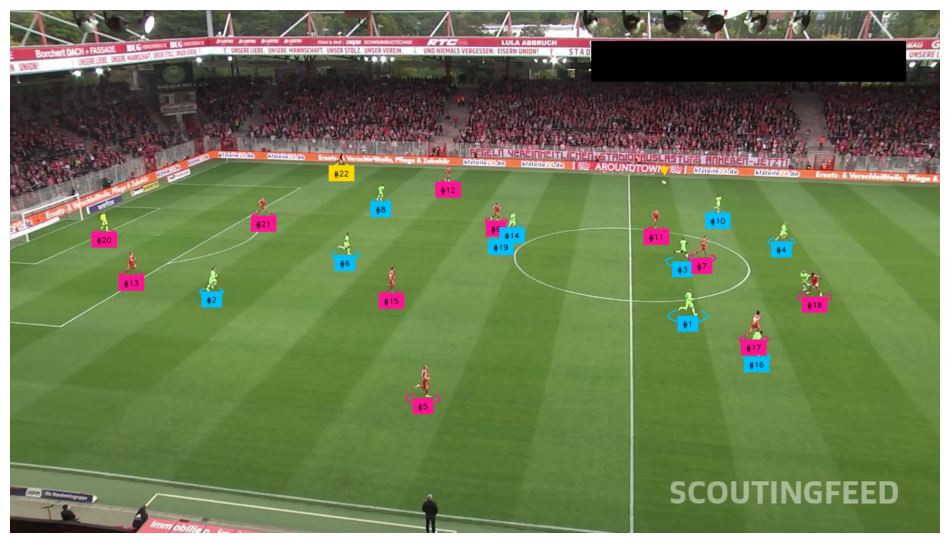

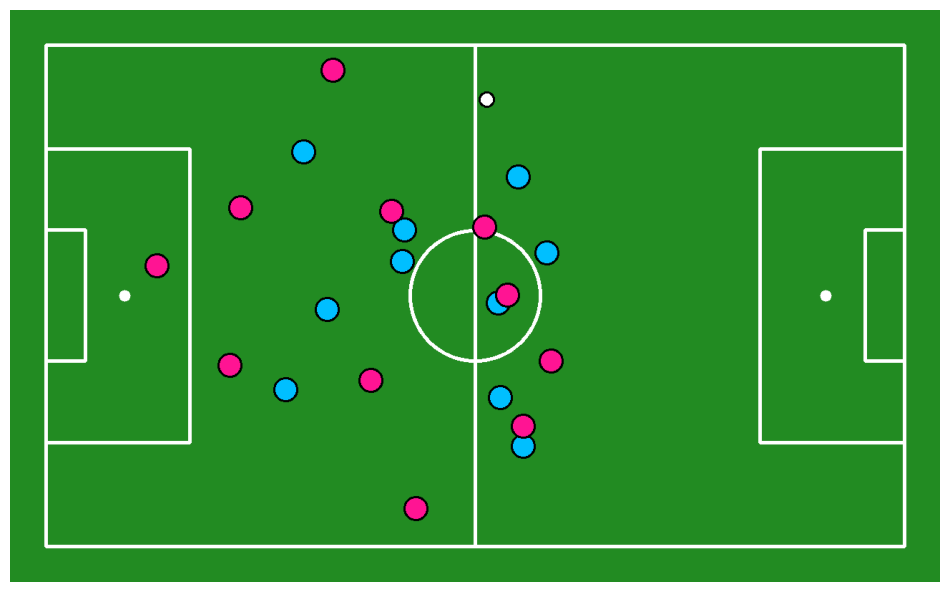

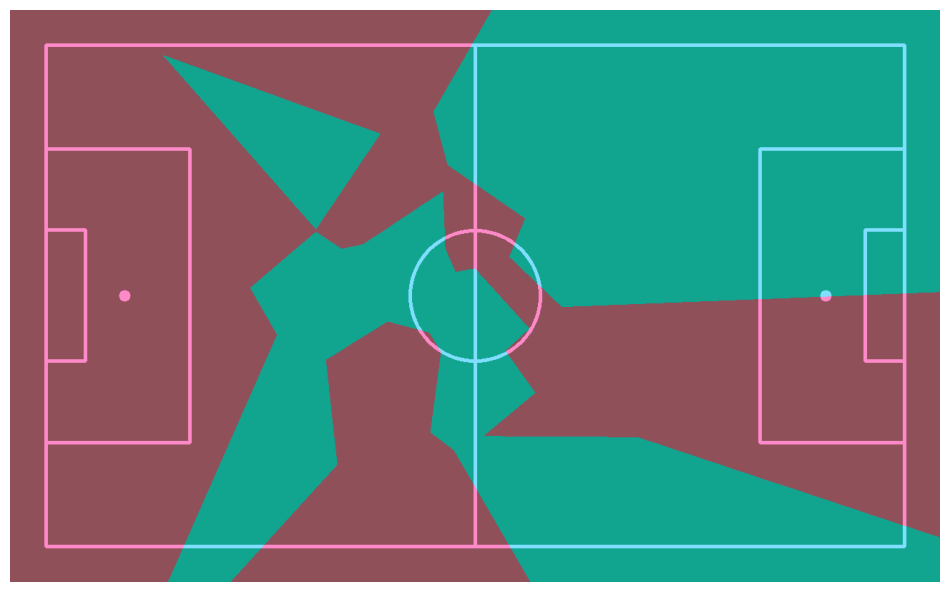

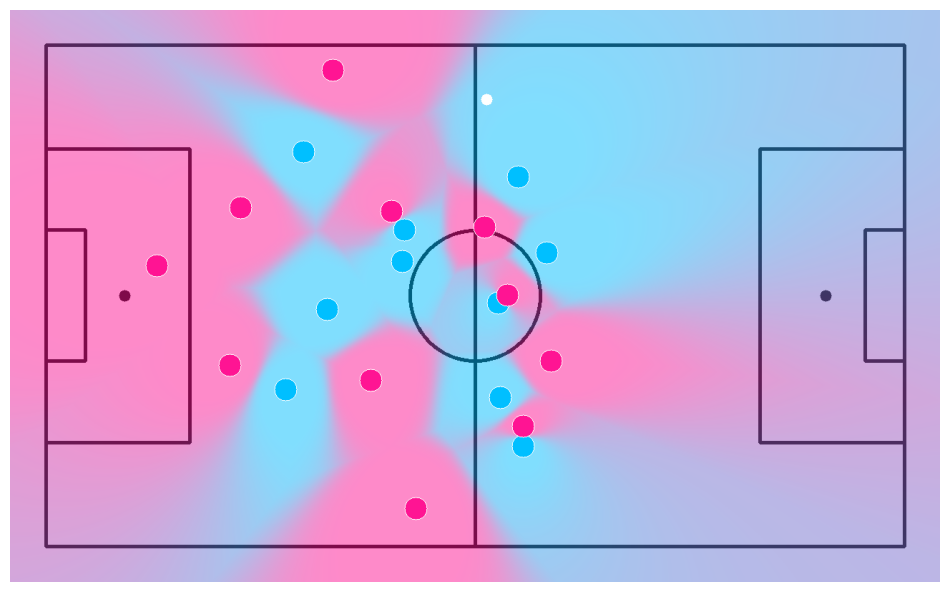

In [ ]:
import supervision as sv
from sports.annotators.soccer import (
    draw_pitch,
    draw_points_on_pitch,
    draw_pitch_voronoi_diagram
)

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# ball, goalkeeper, player, referee detection

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

# team assignment

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections)

referees_detections.class_id -= 1

all_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections, referees_detections])

# frame visualization

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

all_detections.class_id = all_detections.class_id.astype(int)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

players_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections
])

# detect pitch key points

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

# project ball, players and referies on pitch

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
pitch_reference_points = np.array(CONFIG.vertices)[filter]

transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_players_xy = transformer.transform_points(points=players_xy)

referees_xy = referees_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_referees_xy = transformer.transform_points(points=referees_xy)

# visualize video game-style radar view

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.BLACK,
    radius=10,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 0],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 1],
    face_color=sv.Color.from_hex('FF1493'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_referees_xy,
    face_color=sv.Color.from_hex('FFD700'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

# visualize voronoi diagram

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_pitch_voronoi_diagram(
    config=CONFIG,
    team_1_xy=pitch_players_xy[players_detections.class_id == 0],
    team_2_xy=pitch_players_xy[players_detections.class_id == 1],
    team_1_color=sv.Color.from_hex('00BFFF'),
    team_2_color=sv.Color.from_hex('FF1493'),
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

# visualize voronoi diagram with blend

annotated_frame = draw_pitch(
    config=CONFIG,
    background_color=sv.Color.WHITE,
    line_color=sv.Color.BLACK
)
annotated_frame = draw_pitch_voronoi_diagram_2(
    config=CONFIG,
    team_1_xy=pitch_players_xy[players_detections.class_id == 0],
    team_2_xy=pitch_players_xy[players_detections.class_id == 1],
    team_1_color=sv.Color.from_hex('00BFFF'),
    team_2_color=sv.Color.from_hex('FF1493'),
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.WHITE,
    radius=8,
    thickness=1,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 0],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.WHITE,
    radius=16,
    thickness=1,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 1],
    face_color=sv.Color.from_hex('FF1493'),
    edge_color=sv.Color.WHITE,
    radius=16,
    thickness=1,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)